## Notebook analysing data printed by the tested android device at TÜV-Nord
The .txt files in the data directory contain printed information of an android device. This needs to be categorized, clustered and finally analyzed and compared to the _VBOX_ data in the **CrashAnalytics** Notebook.

In [80]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
matplotlib.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (14.0, 11.0)

from LogReader import read_device_log, device_log_to_sensordata

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
res = read_device_log('data/tuev22I.txt')

### Full plot of acceleration data for each axis

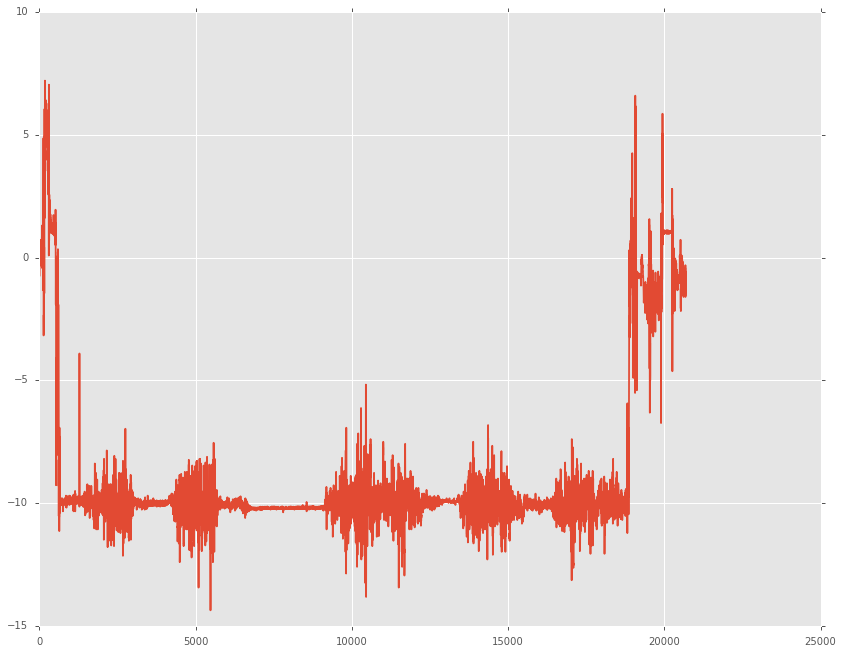

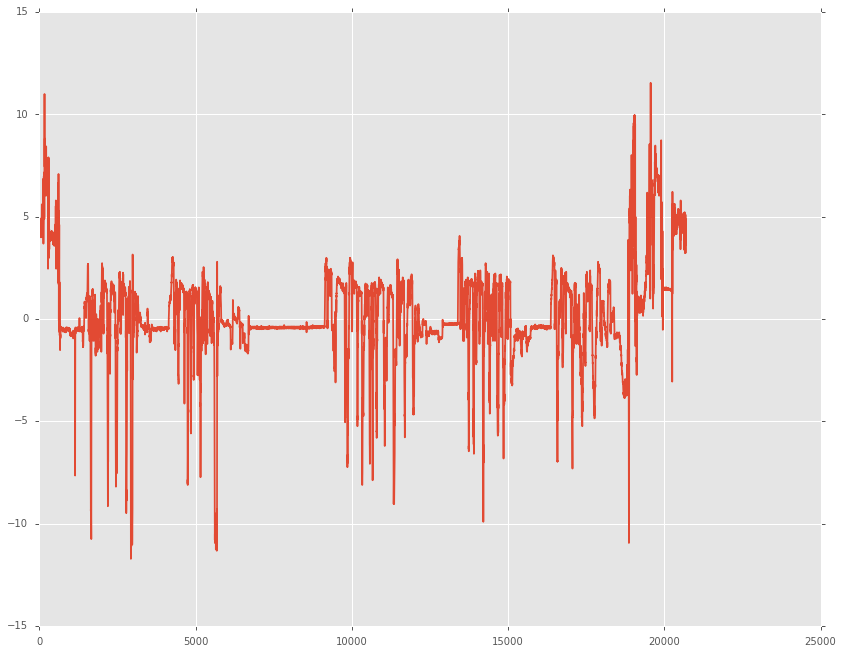

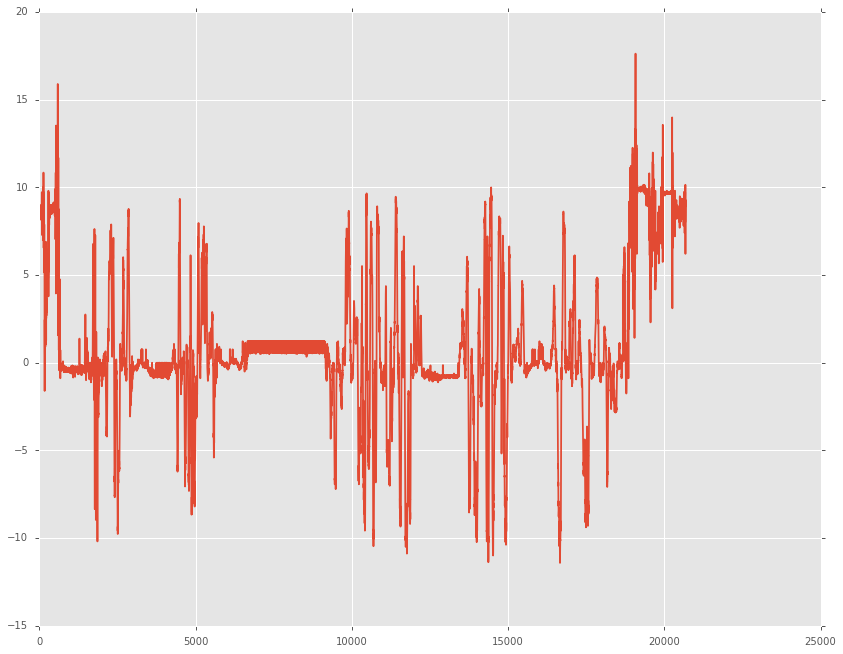

In [82]:
plt.plot(res['acc_x'])
plt.show()

plt.plot(res['acc_y'])
plt.show()

plt.plot(res['acc_z'])
plt.show()

### Plotting data based on accumulated sensor data per second

In [83]:
sensors = device_log_to_sensordata('data/tuev22I.txt')
norm = min([x.time for x in sensors])
times = [t.time - norm for t in sensors]

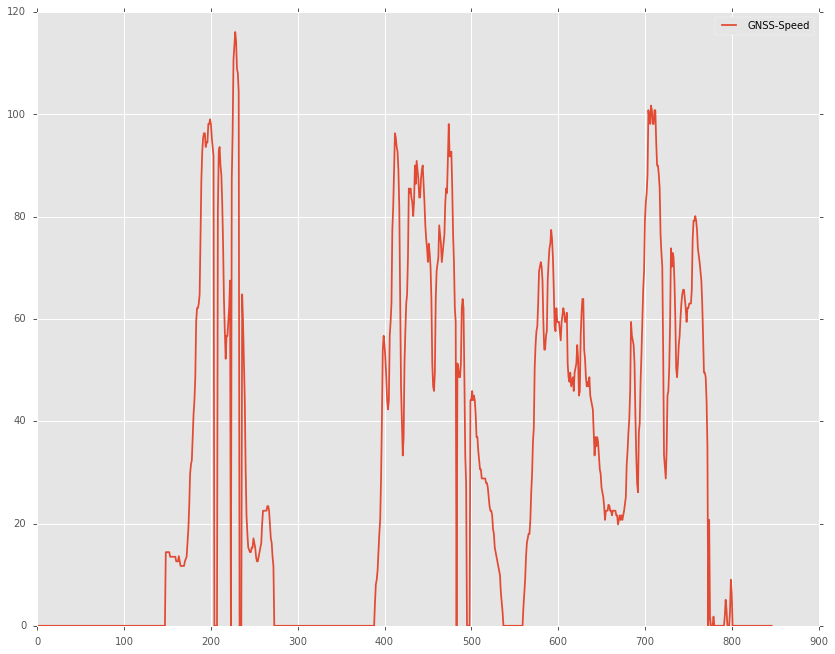

In [ ]:
plt.plot(times, [s.speed for s in sensors], label='GNSS-Speed')
plt.legend()
plt.show()

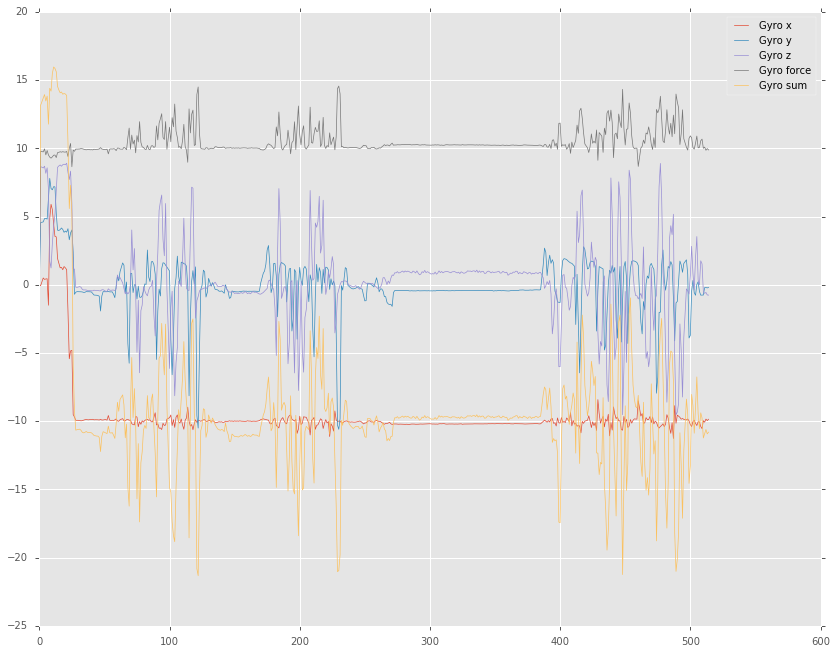

In [86]:
start, end = 0, 500
gyro = [s for s in sensors[start:end]]
t = times[start:end]
plt.plot(t, [s.x for s in gyro], linewidth=0.7, label='Gyro x')
plt.plot(t, [s.y for s in gyro], linewidth=0.7, label='Gyro y')
plt.plot(t, [s.z for s in gyro], linewidth=0.7, label='Gyro z')
plt.plot(t, [s.gyro_force() for s in gyro], linewidth=0.7, label='Gyro force')
plt.plot(t, [s.gyro_sum() for s in gyro], linewidth=0.7, label='Gyro sum')
plt.legend()
plt.show()